<a href="https://colab.research.google.com/github/Nsv61/Netologia_diploma_NSV61/blob/main/Netologia_diploma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  
0                   3  
1                   6  
2                   4  
3                   5  
4                   3  
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%

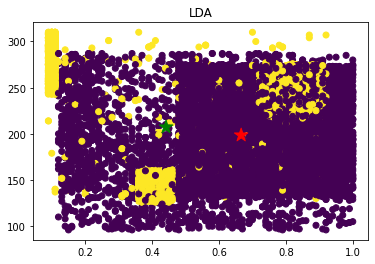

"\nagg_func_math = {'count': ['min']}\ndf_grp = df.groupby(['department']).agg(agg_func_math)    \n# создаем датафрейм, сгруппированный по годам\n"

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# п. 1 Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')

# п. 2 Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение).
df_stat = df
df_stat = df_stat.drop('department', axis=1)
df_stat = df_stat.drop('salary', axis=1)
df_stat = df_stat.drop('promotion_last_5years', axis=1)
df_stat = df_stat.drop('left', axis=1)
df_stat = df_stat.drop('Work_accident', axis=1)

pd.set_option('display.max_columns',None)

print(df_stat.head())
print(df_stat.describe())

# п. 3 Рассчитайте и визуализировать корреляционную матрицу для
# количественных переменных.
# Определите две самые скоррелированные и две наименее скоррелированные переменные.
print(df_stat.corr())

# п. 4 Рассчитайте сколько сотрудников работает в каждом департаменте.
print('п. 4 Рассчитайте сколько сотрудников работает в каждом департаменте.')
print(df['department'].value_counts()) # кол-во людей в каждом отделе

# п. 5 Показать распределение сотрудников по зарплатам.
print('п. 5 Показать распределение сотрудников по зарплатам.')
print(df['salary'].value_counts())  # распределение по зарплатам

# п. 6 Показать распределение сотрудников по зарплатам в каждом
# департаменте по отдельности
print('п. 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности')
print(df.groupby(['department'])['salary'].value_counts())

# п. 8 
print('п. 8')
print('Доля сотрудников с повышением за последние 5 лет')
print(df.groupby(['left'])['promotion_last_5years'].value_counts())

print('Средняя степень удовлетворенности')
print(df.groupby(['left'])['satisfaction_level'].mean())

print('Среднее кол-во проектов')
print(df.groupby(['left'])['number_project'].mean())
# п. 9
print('п. 9')
variety = df['left'].to_numpy()
data = df[['satisfaction_level', 'average_montly_hours']]
# print('variety', variety)
x_train, x_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)   # обучение
lda.predict(x_test)         # прогноз на тестовой выборке
result = pd.DataFrame([y_test, lda.predict(x_test)]).T  # разница теста и расчета
print('result', result)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, lda.predict(x_test)))  # точность верных прогнозов
# print("Коэфф", lda.coef_)   # коэф дискриминантных линий


plt.scatter(x=x_train['satisfaction_level'], y=x_train['average_montly_hours'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c=['r', 'g'], s=200, marker='*')
plt.title('LDA')
plt.show()

# п. 10 Загрузить jupyter notebook с решение на github и прислать ссылку

# https://github.com/Nsv61/Netologia_diploma_NSV61/blob/main/Netologia_diploma.ipynb
'''
agg_func_math = {'count': ['min']}
df_grp = df.groupby(['department']).agg(agg_func_math)    
# создаем датафрейм, сгруппированный по годам
'''